<a href="https://colab.research.google.com/github/female-coders-linz/workshops/blob/master/weather_forecast/weather_forecast_session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get your API key from [*Open Weather Map*](https://rapidapi.com/community/api/open-weather-map/endpoints)

In [ ]:
api_key= input("Enter your API Key:")

In [2]:
import requests

url = "https://rapidapi.p.rapidapi.com/weather"

querystring = {"q":"London,uk","lat":"0","lon":"0","callback":"test","id":"2172797","lang":"null","units":"\"metric\" or \"imperial\"","mode":"xml, html"}

headers = {
    'x-rapidapi-key': api_key,
    'x-rapidapi-host': "community-open-weather-map.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

test({"coord":{"lon":-0.13,"lat":51.51},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03n"}],"base":"stations","main":{"temp":280.13,"feels_like":277.59,"temp_min":277.59,"temp_max":282.15,"pressure":1037,"humidity":76},"visibility":10000,"wind":{"speed":1.5,"deg":280},"clouds":{"all":27},"dt":1604520776,"sys":{"type":1,"id":1414,"country":"GB","sunrise":1604473194,"sunset":1604507295},"timezone":0,"id":2643743,"name":"London","cod":200})


In [3]:
lat = 48.17107
lon = 16.39617

In [4]:
from pprint import pprint

query_string = {
    "lat": lat,
    "lon": lon,
    "units": "metric"
}


response = requests.request("GET", url, headers=headers, params=query_string).json()


pprint(response)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 48.17, 'lon': 16.4},
 'dt': 1604520800,
 'id': 2765028,
 'main': {'feels_like': 5.28,
          'humidity': 76,
          'pressure': 1030,
          'temp': 10.45,
          'temp_max': 11.67,
          'temp_min': 9.44},
 'name': 'Simmering',
 'sys': {'country': 'AT',
         'id': 6878,
         'sunrise': 1604468683,
         'sunset': 1604503871,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 320, 'speed': 6.2}}


In [5]:
import pandas as pd

from datetime import datetime

url = "https://rapidapi.p.rapidapi.com/forecast/daily"


n_days = 15

query_string = {
    "lat": lat,
    "lon": lon,
    "units": "metric",
    "cnt": n_days
}

response = requests.request("GET", url, headers=headers, params=query_string).json()


# pprint(response['list'][0]["temp"]["day"])
# pprint(response['city']['name'])
# pprint(response)

temperatures = list(
)

for elem in response['list']:
  temperatures.append({
      "day_temp": elem['temp']["day"],
      "min_temp": elem["temp"]["min"],
      "max_temp": elem["temp"]["max"],
      "dt": datetime.utcfromtimestamp(elem["dt"]),
      "humidity": elem["humidity"]
  })
  # print(datetime.utcfromtimestamp(elem["dt"]))



# print(temperatures)

temperatures_df = pd.DataFrame(temperatures)
temperatures_df.head(4)

,day_temp,min_temp,max_temp,dt,humidity
0,10.60,10.45,14.83,2020-11-04 10:00:00,76
1,9.53,7.30,11.29,2020-11-05 10:00:00,63
2,7.80,4.57,10.52,2020-11-06 10:00:00,60
3,7.86,3.67,11.93,2020-11-07 10:00:00,60


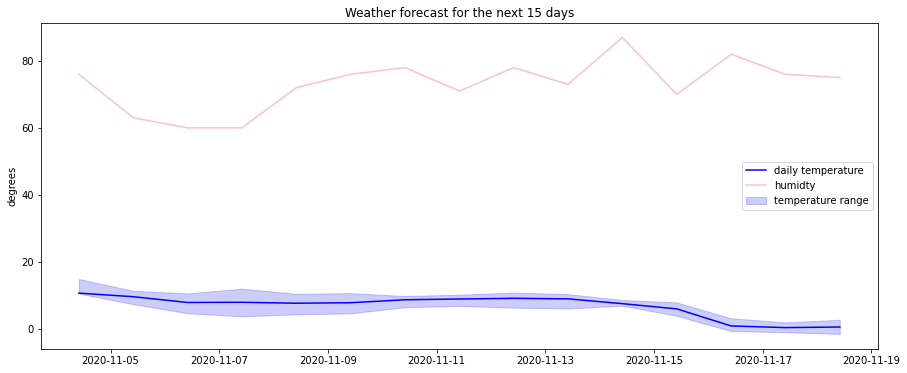

In [6]:

import matplotlib.pyplot as plt


fig = plt.figure(figsize=(15,6))
plt.plot(temperatures_df["dt"], temperatures_df["day_temp"], label="daily temperature", color="blue")
# plt.plot(temperatures_df["dt"], temperatures_df["min_temp"], label="min temperature")
# plt.plot(temperatures_df["dt"], temperatures_df["max_temp"], label="max temperature")
plt.fill_between(x=temperatures_df["dt"], y1=temperatures_df["min_temp"], y2=temperatures_df["max_temp"], alpha=0.2, label="temperature range", color="blue")

plt.plot(temperatures_df["dt"], temperatures_df["humidity"], label='humidty', color="pink")

plt.title(f"Weather forecast for the next {n_days} days")
plt.ylabel("degrees")
plt.legend()
plt.show()

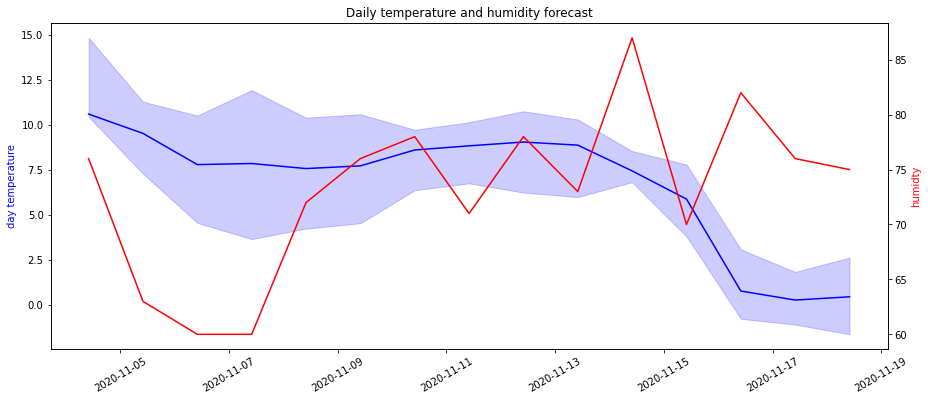

In [7]:
fig, ax1 = plt.subplots(figsize=(15,6))

ax1.plot(temperatures_df["dt"], temperatures_df["day_temp"], label="daily temperature", color="blue")
plt.xticks(rotation=30)

ax1.fill_between(x=temperatures_df["dt"], y1=temperatures_df["min_temp"], y2=temperatures_df["max_temp"], alpha=0.2, label="temperature range", color="blue")

ax2 = ax1.twinx()
ax2.plot(temperatures_df["dt"], temperatures_df["humidity"], label='humidity', color='red')

ax1.set_ylabel("day temperature", color='blue')
ax2.set_ylabel("humidty", color='red')

plt.title("Daily temperature and humidity forecast")
plt.show()

In [8]:
import plotly.graph_objects as go

fig = go.Figure(
    go.Bar(x=temperatures_df["dt"], y=temperatures_df["day_temp"], marker_color="blue", name="temperature bar")
)
fig.add_trace(
    go.Scatter(
      x=temperatures_df.dt, 
      y=temperatures_df["day_temp"], 
      marker_color="red", 
      name="temperature line")
)

fig.update_yaxes(title="degrees")
fig.update_layout(title_text="Weather forecast")
fig.show()

In [9]:
from plotly.io import to_html

import plotly
# to_html(fig)

plotly.offline.plot(fig, filename="plot.html")

# Info: you can download the plot from the folder 
# (in Google Collab on the folder is accessible on the left side :) )

'plot.html'